In [1]:
%matplotlib inline

In [2]:
from framed import load_cbmodel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('white')

### Load models

In [3]:
organisms = ['B. subtilis', 'E. coli', 'M. genitalium',
             'P. aeruginosa', 'R. solanacearum', 'S. oneidensis']

original = {
    'B. subtilis': ('../models/original/iYO844.xml', 'bigg'),
    'E. coli': ('../models/original/iML1515.xml', 'bigg'),
    'M. genitalium': ('../models/original/iPS189_fixed.xml', 'cobra'),
    'P. aeruginosa': ('../models/original/iMO1056_fixed.xml', 'cobra'),
    'R. solanacearum': ('../models/original/iRP1476_fixed.xml', 'cobra'),
    'S. oneidensis': ('../models/original/iSO783_fixed.xml', 'cobra')
}

carveme = {
    'B. subtilis': ('../models/CarveMe/Bsubtilis_168_ensemble.xml', 'cobra'),
    'E. coli': ('../models/CarveMe/Ecoli_K12_MG1655_ensemble.xml', 'cobra'),
    'M. genitalium': ('../models/CarveMe/M_genitalium_G37.xml', 'cobra'),
    'P. aeruginosa': ('../models/CarveMe/Paeruginosa_PAO1_ensemble.xml', 'cobra'),
    'R. solanacearum': ('../models/CarveMe/Rsolanacearum_GMI1000_ensemble.xml', 'cobra'),
    'S. oneidensis': ('../models/CarveMe/Soneidensis_MR1_ensemble.xml', 'cobra')
}

modelseed = {
    'B. subtilis': ('../models/modelSEED/bsubtilis.xml', 'seed'),
    'E. coli': ('../models/modelSEED/ecoli.xml', 'seed'),
    'M. genitalium': ('../models/modelSEED/mgenitalium.xml', 'seed'),
    'P. aeruginosa': ('../models/modelSEED/paeruginosa.xml', 'seed'),
    'R. solanacearum': ('../models/modelSEED/rsolanacearum.xml', 'seed'),
    'S. oneidensis': ('../models/modelSEED/soneidensis.xml', 'seed')
}

In [4]:
for label, (model_file, flavor) in original.items():
    original[label] =  load_cbmodel(model_file, flavor=flavor)

for label, (model_file, flavor) in carveme.items():
    carveme[label] =  load_cbmodel(model_file, flavor=flavor)
    
for label, (model_file, flavor) in modelseed.items():
    modelseed[label] =  load_cbmodel(model_file, flavor=flavor)

### Summarize data

In [5]:
data = []
spontaneous = {'G_spontaneous', 'G_Unknown', 'G_s0001', 'G_NoAssignment'} 

for organism in organisms:
    
    model = original[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'Original', n_genes, n_enzrxns, n_mets))
    
    model = carveme[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('R_EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[2:-2] for x in model.metabolites})
    data.append((organism, 'CarveMe', n_genes, n_enzrxns, n_mets))
    
    model = modelseed[organism]
    n_genes = len(set(model.genes) - spontaneous)
    #n_rxns = len([x for x in model.reactions if not x.startswith('EX_')])
    n_enzrxns = len([x for x, rxn in model.reactions.items()
                     if rxn.gpr is not None and str(rxn.gpr) not in spontaneous])
    n_mets = len({x[:-3] for x in model.metabolites})
    
    data.append((organism, 'modelSEED', n_genes, n_enzrxns, n_mets))
    
df = pd.DataFrame(data, columns=['Organism', 'Source', 'Genes', 'Reactions', 'Metabolites'])

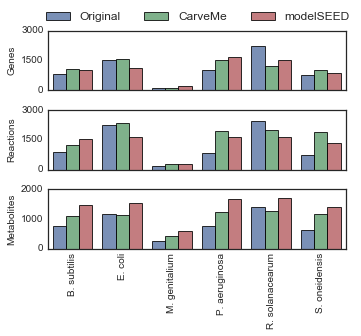

In [150]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(5, 4.5))

sns.barplot(x="Organism", y="Genes", hue="Source", data=df, palette='deep', ax=ax1, alpha=0.8)
ax1.set_ylim(0, 3000)
ax1.set_yticks([0, 1500, 3000])
ax1.set_xlabel('')
legend_handles, legend_text = ax1.get_legend_handles_labels()
ax1.legend(legend_text, bbox_to_anchor=(1.05, 1.5), ncol=3, handles=legend_handles)


sns.barplot(x="Organism", y="Reactions", hue="Source", data=df, palette='deep', ax=ax2, alpha=0.8)
ax2.set_ylim(0, 3000)
ax2.set_yticks([0, 1500, 3000])
ax2.get_legend().set_title('')
ax2.set_xlabel('')
ax2.legend([])

res = sns.barplot(x="Organism", y="Metabolites", hue="Source", data=df, palette='deep', ax=ax3, alpha=0.8)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylim(0, 2000)
ax3.set_yticks([0, 1000, 2000])
ax3.set_xlabel('')
ax3.legend([])

plt.tight_layout()
plt.savefig('../results/other/summary.png', dpi=300, bbox_inches='tight')